In [ ]:
import uproot
import awkward as ak
import h5py
import matplotlib.pyplot as plt
import vector

data_file_path = "/mnt/iusers01/fse-ugpgt01/phy01/b58521jg/masters_project/introduction_work/transformers/Nov13/4tops_skimmed_14nov.root"

vector.register_awkward()
file = uproot.open(data_file_path)

print(file["Truth;1"].keys())

desired_keys = [
    "top_pt",
    "top_eta",
    "top_phi",
    "top_mass",
]

for iterate_array in file["Truth;1"].iterate(desired_keys, how="zip", step_size=500_000):
    
    # Extract the top quark fields directly
    top_branch = iterate_array["top"]
    pt   = top_branch["pt"]
    eta  = top_branch["eta"]
    phi  = top_branch["phi"]
    mass = top_branch["mass"]
    
    # Ensure they're float64
    pt   = ak.values_astype(pt,   "float64")
    eta  = ak.values_astype(eta,  "float64")
    phi  = ak.values_astype(phi,  "float64")
    mass = ak.values_astype(mass, "float64")
    
    # Reconstruct as a clean Momentum4D record
    tops_clean = ak.zip(
        {"pt": pt, "eta": eta, "phi": phi, "mass": mass},
        with_name="Momentum4D",
    )
    
    # Now you can access and use the top properties
    print(f"Number of events: {len(tops_clean)}")
    print(f"Top pt: {tops_clean.pt}")
    print(f"Top eta: {tops_clean.eta}")
    print(f"Top phi: {tops_clean.phi}")
    print(f"Top mass: {tops_clean.mass}")

['nEventNumber', 'EventNumber', 'ntop_pt', 'top_pt', 'ntop_eta', 'top_eta', 'ntop_phi', 'top_phi', 'ntop_e', 'top_e', 'ntop_mass', 'top_mass', 'ntop_id', 'top_id', 'nW_pt', 'W_pt', 'nW_eta', 'W_eta', 'nW_phi', 'W_phi', 'nW_e', 'W_e', 'nW_mass', 'W_mass', 'nW_id', 'W_id', 'nb_id', 'b_id', 'nb_pt', 'b_pt', 'nb_eta', 'b_eta', 'nb_phi', 'b_phi', 'nb_e', 'b_e', 'nb_mass', 'b_mass', 'nW_decay_id', 'W_decay_id', 'nW_decay_pt', 'W_decay_pt', 'nW_decay_eta', 'W_decay_eta', 'nW_decay_phi', 'W_decay_phi', 'nW_decay_e', 'W_decay_e', 'nW_decay_mass', 'W_decay_mass']


FieldNotFoundError: no field 'top_pt' in record with 1 fields

In [91]:
event_sum = ak.sum(jets_clean, axis=1)

# Reconstruct as a clean Momentum4D record
event_sum = ak.zip(
    {
        "pt": event_sum.pt,
        "eta": event_sum.eta,
        "phi": event_sum.phi,
        "mass": event_sum.mass,
    },
    with_name="Momentum4D",
)


In [98]:
print(event_sum[0].E)

2014.4724576653794


In [ ]:

data_file_path = "/mnt/iusers01/fse-ugpgt01/phy01/b58521jg/masters_project/introduction_work/transformers/Nov13/4tops_withtruth_13Nov.root"
vector.register_awkward() 
file = uproot.open(data_file_path)
print(file["Truth;1"].keys())

print(file["Truth;1"]["ntop_pt"].array())



['nEventNumber', 'EventNumber', 'ntop_pt', 'top_pt', 'ntop_eta', 'top_eta', 'ntop_phi', 'top_phi', 'ntop_e', 'top_e', 'ntop_mass', 'top_mass', 'ntop_id', 'top_id', 'nW_pt', 'W_pt', 'nW_eta', 'W_eta', 'nW_phi', 'W_phi', 'nW_e', 'W_e', 'nW_mass', 'W_mass', 'nW_id', 'W_id', 'nb_id', 'b_id', 'nb_pt', 'b_pt', 'nb_eta', 'b_eta', 'nb_phi', 'b_phi', 'nb_e', 'b_e', 'nb_mass', 'b_mass', 'nW_decay_id', 'W_decay_id', 'nW_decay_pt', 'W_decay_pt', 'nW_decay_eta', 'W_decay_eta', 'nW_decay_phi', 'W_decay_phi', 'nW_decay_e', 'W_decay_e', 'nW_decay_mass', 'W_decay_mass']
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..., 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


['nEventNumber', 'EventNumber', 'ntop_pt', 'top_pt', 'ntop_eta', 'top_eta', 'ntop_phi', 'top_phi', 'ntop_e', 'top_e', 'ntop_mass', 'top_mass', 'ntop_id', 'top_id', 'nW_pt', 'W_pt', 'nW_eta', 'W_eta', 'nW_phi', 'W_phi', 'nW_e', 'W_e', 'nW_mass', 'W_mass', 'nW_id', 'W_id', 'nb_id', 'b_id', 'nb_pt', 'b_pt', 'nb_eta', 'b_eta', 'nb_phi', 'b_phi', 'nb_e', 'b_e', 'nb_mass', 'b_mass', 'nW_decay_id', 'W_decay_id', 'nW_decay_pt', 'W_decay_pt', 'nW_decay_eta', 'W_decay_eta', 'nW_decay_phi', 'W_decay_phi', 'nW_decay_e', 'W_decay_e', 'nW_decay_mass', 'W_decay_mass']
Number of events: 500000
Top pt: [[252, 115, 173, 47.6], [127, 218, 284, 445], ..., [317, 91.4, 39.6, 374]]
Top eta: [[-1.35, -2.57, -0.441, 2.2], [2.25, ...], ..., [-1.32, 1.74, -1.38, 1.64]]
Top phi: [[-1.05, 1.14, 2.38, -3.04], [-0.0393, ...], ..., [3.05, -1.71, -3, 0.18]]
Number of events: 250000
Top pt: [[273, 198, 71.8, 147], [381, 26.4, 490, 105], ..., [...], [187, 227, 392, 366]]
Top eta: [[0.438, -2.63, 0.384, -0.895], [-2.03, 

(array([2.9300e+02, 1.9460e+03, 5.0030e+03, 8.3480e+03, 1.1436e+04,
        1.3712e+04, 1.5239e+04, 1.5975e+04, 1.6330e+04, 1.5847e+04,
        1.4890e+04, 1.4105e+04, 1.3158e+04, 1.1917e+04, 1.0596e+04,
        9.7280e+03, 8.7720e+03, 7.7740e+03, 6.8740e+03, 6.0720e+03,
        5.4160e+03, 4.6970e+03, 4.0830e+03, 3.6410e+03, 3.1540e+03,
        2.7420e+03, 2.4100e+03, 2.1490e+03, 1.8660e+03, 1.5420e+03,
        1.4270e+03, 1.1890e+03, 1.0810e+03, 8.8600e+02, 7.8500e+02,
        6.6300e+02, 5.4700e+02, 5.3500e+02, 3.9400e+02, 3.5800e+02,
        3.3900e+02, 2.6800e+02, 2.3800e+02, 2.1100e+02, 1.8300e+02,
        1.6600e+02, 1.2000e+02, 1.1500e+02, 9.4000e+01, 8.0000e+01,
        8.4000e+01, 9.7000e+01, 5.7000e+01, 5.7000e+01, 5.4000e+01,
        3.8000e+01, 2.9000e+01, 3.3000e+01, 2.2000e+01, 2.1000e+01,
        1.4000e+01, 1.2000e+01, 1.6000e+01, 1.5000e+01, 8.0000e+00,
        6.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 6.0000e+00,
        3.0000e+00, 5.0000e+00, 5.0000e+00, 2.00

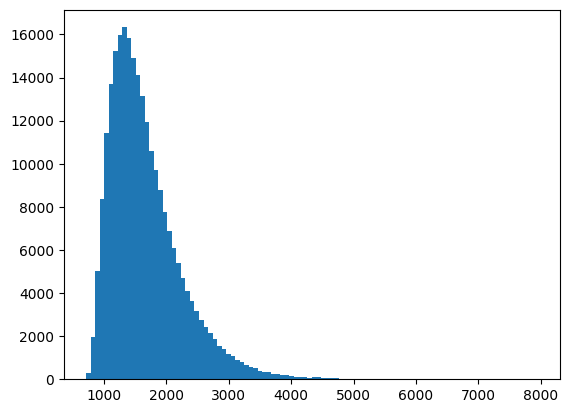

In [ ]:
import uproot
import awkward as ak
import h5py
import matplotlib.pyplot as plt
import vector

data_file_path = "/mnt/iusers01/fse-ugpgt01/phy01/b58521jg/masters_project/introduction_work/transformers/Nov13/4tops_withtruth_13Nov.root"

vector.register_awkward()
file = uproot.open(data_file_path)

print(file["Truth;1"].keys())

desired_keys = [
    "top_pt",
    "top_eta",
    "top_phi",
    "top_mass"
]

# First, get the Reco branch to identify events with nel_pt == 0
reco_file = file["Reco;1"]
nel_pt_array = reco_file["nel_pt"].array()
# Get indices where nel_pt == 0
good_indices = ak.where(nel_pt_array == 0)[0]

# Accumulate results
all_tops_clean = []
all_sums = []

for iterate_array in file["Truth;1"].iterate(desired_keys, how="zip", step_size=500_000):
    iterate_array = iterate_array["top"]
    
    # Extract the top quark fields directly
    pt   = iterate_array["pt"]
    eta  = iterate_array["eta"]
    phi  = iterate_array["phi"]
    mass = iterate_array["mass"]
    
    # Ensure they're float64
    pt   = ak.values_astype(pt,   "float64")
    eta  = ak.values_astype(eta,  "float64")
    phi  = ak.values_astype(phi,  "float64")
    mass = ak.values_astype(mass, "float64")
    
    # Reconstruct as a clean Momentum4D record
    tops_clean = ak.zip(
        {"pt": pt, "eta": eta, "phi": phi, "mass": mass},
        with_name="Momentum4D",
    )
    
    # Filter to only keep events where nel_pt == 0
    tops_clean_filtered = tops_clean[good_indices]
    
    # Calculate the Lorentz sum for each event
    event_sums = ak.sum(tops_clean_filtered, axis=1)
    
    # Append to accumulator lists
    all_tops_clean.append(tops_clean_filtered)
    all_sums.append(event_sums)
    
    print(f"Batch events: {len(tops_clean_filtered)}")

# Concatenate all chunks
all_tops_clean = ak.concatenate(all_tops_clean)
all_sums = ak.concatenate(all_sums)

print(f"Total events: {len(all_tops_clean)}")
print(f"Total summed events: {len(all_sums)}")

# Plot the invariant mass of the summed tops
plt.figure(figsize=(10, 6))
plt.hist(all_sums.mass, bins=100)
plt.xlabel("Invariant Mass (GeV)")
plt.ylabel("Events")
plt.title("Invariant Mass of Summed Top Quarks")
plt.show()